Name: Amartya Sinha

Roll No: AC-1207

In [2]:
import numpy as np
import pandas as pd

Guidelines


6. Consider any sales training/ weather forecasting dataset
    1. Compute mean of a series grouped by another series
    2. Fill an intermittent time series to replace all missingdates with values of previous non-missing date.
    3. Perform appropriate year-month string to dates  conversion.
    4. Split a dataset to group by two columns and then sort the aggregated results within the groups.
    5. Split a given dataframe into groups with bin counts.

In [106]:
df = pd.read_csv('BangaloreData.csv', parse_dates=['time'], dayfirst=True)
df

,time,tavg,tmin,tmax,prcp
0,1990-01-01,22.9,19.1,28.4,NaN
1,1990-01-02,21.7,NaN,26.5,0.0
2,1990-01-03,21.0,16.4,26.5,0.0
3,1990-01-04,20.8,NaN,27.4,0.0
4,1990-01-05,20.4,14.2,26.1,0.0
...,...,...,...,...,...
11889,2022-07-21,23.7,20.5,30.8,82.5
11890,2022-07-22,23.2,21.1,27.9,0.0
11891,2022-07-23,23.1,20.9,26.7,0.0
11892,2022-07-24,22.8,20.0,26.7,0.3


In [107]:
ts = pd.to_datetime(df['time'], format='%d-%m-%Y')
ts

0       1990-01-01
1       1990-01-02
2       1990-01-03
3       1990-01-04
4       1990-01-05
           ...    
11889   2022-07-21
11890   2022-07-22
11891   2022-07-23
11892   2022-07-24
11893   2022-07-25
Name: time, Length: 11894, dtype: datetime64[ns]

In [108]:
# Compute mean of a series grouped by another series
df.groupby(ts.dt.month).mean(numeric_only=True)

,tavg,tmin,tmax,prcp
time,,,,
1,21.539156,16.060430,28.599791,0.146292
2,23.721805,17.550114,31.030984,0.356235
3,26.363636,20.138197,33.462526,1.155000
4,27.380263,22.053103,34.208298,4.564068
5,26.386832,21.687972,33.073299,5.759854
6,24.264126,20.672931,29.784790,4.171346
7,23.288987,20.208108,28.410196,4.814157
8,23.131034,20.090282,28.145989,5.652453
9,23.558958,20.059524,28.744372,8.017294


In [109]:
# Fill an intermittent time series to replace all missingdates with values of previous non-missing date.
new_df = df.drop(np.random.randint(0, 180, 25))
new_df

,time,tavg,tmin,tmax,prcp
0,1990-01-01,22.9,19.1,28.4,NaN
1,1990-01-02,21.7,NaN,26.5,0.0
2,1990-01-03,21.0,16.4,26.5,0.0
3,1990-01-04,20.8,NaN,27.4,0.0
5,1990-01-06,20.4,17.1,24.2,NaN
...,...,...,...,...,...
11889,2022-07-21,23.7,20.5,30.8,82.5
11890,2022-07-22,23.2,21.1,27.9,0.0
11891,2022-07-23,23.1,20.9,26.7,0.0
11892,2022-07-24,22.8,20.0,26.7,0.3


In [110]:
ts = new_df.set_index('time')      # making time-series
ts.resample('D').ffill()

,tavg,tmin,tmax,prcp
time,,,,
1990-01-01,22.9,19.1,28.4,NaN
1990-01-02,21.7,NaN,26.5,0.0
1990-01-03,21.0,16.4,26.5,0.0
1990-01-04,20.8,NaN,27.4,0.0
1990-01-05,20.8,NaN,27.4,0.0
...,...,...,...,...
2022-07-21,23.7,20.5,30.8,82.5
2022-07-22,23.2,21.1,27.9,0.0
2022-07-23,23.1,20.9,26.7,0.0


In [78]:
# Perform appropriate year-month string to dates  conversion.
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
df['time']

0       1990-01-01
1       1990-01-02
2       1990-01-03
3       1990-01-04
4       1990-01-05
           ...    
11889   2022-07-21
11890   2022-07-22
11891   2022-07-23
11892   2022-07-24
11893   2022-07-25
Name: time, Length: 11894, dtype: datetime64[ns]

In [83]:
# Split a dataset to group by two columns and then sort the aggregated results within the groups.
month = df['time'].dt.month
weekday = df['time'].dt.weekday

In [84]:
def sort_val(df):
    return df.sort_values('tavg')

In [85]:
my_df = df.groupby([month, weekday]).apply(sort_val)

In [89]:
my_df

time  tavg  tmin  tmax  prcp
time time                                         
1    0    1827  1995-01-02  18.3   NaN  25.7   0.0
          735   1992-01-06  18.9  11.3   NaN   0.0
          1099  1993-01-04  18.9  13.7  27.4   0.0
          2562  1997-01-06  19.0  15.3  26.1   0.0
          756   1992-01-27  19.2  12.0  26.4   0.0
...                    ...   ...   ...   ...   ...
12   6    11661 2021-12-05  23.2  19.8  28.4   1.0
          10583 2018-12-23  23.2  19.2  29.6   NaN
          2904  1997-12-14  23.6  19.8  28.9   0.0
          9477  2015-12-13  24.1  19.9  30.9   NaN
          1448  1993-12-19   NaN   NaN   NaN   NaN

[11894 rows x 5 columns]

In [95]:
# Split a given dataframe into groups with bin counts.
pd.cut(df['tavg'], 4).value_counts()

(21.0, 24.8]      7191
(24.8, 28.6]      3142
(17.185, 21.0]    1095
(28.6, 32.4]       396
Name: tavg, dtype: int64

Guidelines


7. Consider a data frame containing data about students i.e. name, gender and passing division:
    1. Perform one hot encoding of the last two columns ofcategorical data using the get_dummies() function.
    2. Sort this dataframe on the “BirthMonth” column(i.e. January to December). Hint: Convert Month to Categorical.

In [29]:
q7_df = pd.read_csv('p6_q7.csv')
q7_df

,Name,Birth_Month,Gender,Pass_Division
0,Mudit Chauhan,December,M,III
1,Seema Chopra,January,F,II
2,Rani Gupta,March,F,I
3,Aditya Narayan,October,M,I
4,Sanjeev Sahni,February,M,II
5,Prakash Kumar,December,M,III
6,Ritu Agarwal,September,F,I
7,Akshay Goel,August,M,I
8,Meeta Kulkarni,July,F,II
9,Preeti Ahuja,November,F,II


In [42]:
# Perform one hot encoding of the last two columns ofcategorical data using the get_dummies() function.
pd.get_dummies(data=q7_df, columns=['Gender', 'Pass_Division'])

,Name,Birth_Month,Gender_F,Gender_M,Pass_Division_I,Pass_Division_II,Pass_Division_III
0,Mudit Chauhan,December,0,1,0,0,1
1,Seema Chopra,January,1,0,0,1,0
2,Rani Gupta,March,1,0,1,0,0
3,Aditya Narayan,October,0,1,1,0,0
4,Sanjeev Sahni,February,0,1,0,1,0
5,Prakash Kumar,December,0,1,0,0,1
6,Ritu Agarwal,September,1,0,1,0,0
7,Akshay Goel,August,0,1,1,0,0
8,Meeta Kulkarni,July,1,0,0,1,0
9,Preeti Ahuja,November,1,0,0,1,0


In [57]:
# Sort this dataframe on the “BirthMonth” column(i.e. January to December). Hint: Convert Month to Categorical.
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
q7_df["Birth_Month"] = pd.Categorical(q7_df["Birth_Month"], categories = months_categories)
q7_df.sort_values(by = "Birth_Month")

,Name,Birth_Month,Gender,Pass_Division
1,Seema Chopra,January,F,II
11,Sonali Sapre,January,F,I
4,Sanjeev Sahni,February,M,II
14,Kiran Sharma,February,F,II
2,Rani Gupta,March,F,I
10,Sunil Das Gupta,April,M,III
13,Ashish Dubey,May,M,II
12,Rashmi Talwar,June,F,III
8,Meeta Kulkarni,July,F,II
7,Akshay Goel,August,M,I


In [48]:
q7_df

,Name,Birth_Month,Gender,Pass_Division
0,Mudit Chauhan,December,M,III
1,Seema Chopra,January,F,II
2,Rani Gupta,March,F,I
3,Aditya Narayan,October,M,I
4,Sanjeev Sahni,February,M,II
5,Prakash Kumar,December,M,III
6,Ritu Agarwal,September,F,I
7,Akshay Goel,August,M,I
8,Meeta Kulkarni,July,F,II
9,Preeti Ahuja,November,F,II


Prev Yr Ques Paper


5. Consider the following DataFrame ADM containing data of freshly admitted students in a college during various rounds of admission. The DataFrame consists of the student’s name, cutoff list in which he/she has taken admission, date of admission, his/her % of marks, course code and gender.


Perform the following:
1. Set the first column ‘Sid’ as the row index of the given DataFrame ADM. Create a pivot table of the DataFrame to display the total number of admissions as per ‘Course Code’ and  ‘Gender’.
2. For each ‘List’, find the total number of admissions, minimum ‘Marks%’ and maximum ‘Marks%’ in each course.
3. Calculate and display the average ‘Marks%’ of all Female students of course ‘C112’.

In [3]:
ADM = pd.read_csv('P6_Q5.CSV')

In [4]:
ADM

,Sid,Name,List,DateAdm,Marks%,CourseCode,Gender
0,S1,Amit Jaiswal,I,01-07-2021,97.00,C001,Male
1,S2,Pradeep Dubey,II,09-07-2021,95.00,C009,Male
2,S3,Rinky Arora,I,04-07-2021,90.00,C112,Female
3,S4,Sonia Shah,IV,01-08-2021,96.00,C001,Female
4,S5,Sushil Negi,III,20-07-2021,96.50,C001,Male
5,S6,Neeraj Gaur,II,11-07-2021,94.50,C009,Male
6,S7,Preeti Sharma,IV,03-08-21,89.00,C112,Female
7,S8,Deep Gupta,III,23-07-2021,95.75,C001,Male
8,S9,Priya Bansal,II,10-7-2021,93.50,C009,Female
9,S10,Anand Ahuja,I,01-07-2021,88.50,C112,Male


In [5]:
# Set the first column ‘Sid’ as the row index of the given DataFrame ADM.
ADM.set_index('Sid')

,Name,List,DateAdm,Marks%,CourseCode,Gender
Sid,,,,,,
S1,Amit Jaiswal,I,01-07-2021,97.00,C001,Male
S2,Pradeep Dubey,II,09-07-2021,95.00,C009,Male
S3,Rinky Arora,I,04-07-2021,90.00,C112,Female
S4,Sonia Shah,IV,01-08-2021,96.00,C001,Female
S5,Sushil Negi,III,20-07-2021,96.50,C001,Male
S6,Neeraj Gaur,II,11-07-2021,94.50,C009,Male
S7,Preeti Sharma,IV,03-08-21,89.00,C112,Female
S8,Deep Gupta,III,23-07-2021,95.75,C001,Male
S9,Priya Bansal,II,10-7-2021,93.50,C009,Female


In [10]:
# Create a pivot table of the DataFrame to display the total number of admissions as per ‘Course Code’ and  ‘Gender’.
pd.pivot_table(ADM, values=['Sid'], index=['CourseCode', 'Gender'], aggfunc='count')

Sid
CourseCode Gender     
C001       Female    1
           Male      3
C009       Female    1
           Male      2
C112       Female    2
           Male      1

In [13]:
# For each ‘List’, find the total number of admissions, minimum ‘Marks%’ and maximum ‘Marks%’ in each course.
pd.pivot_table(ADM, values=['Sid','Marks%'], index=['List'], aggfunc={'Sid': 'count', 'Marks%': [min, max]})

Marks%          Sid
        max    min count
List                    
I      97.0  88.50     3
II     95.0  93.50     3
III    96.5  95.75     2
IV     96.0  89.00     2

In [26]:
# Calculate and display the average ‘Marks%’ of all Female students of course ‘C112’.
ADM[(ADM['CourseCode']=='C112') & (ADM['Gender']=='Female')].mean(numeric_only=True)

Marks%    89.5
dtype: float64

Prev Yr Ques Paper


6.  1. Give Pandas statements to create two dataseries of random floating-point numbers where the first dataseries has a datetime index of all second Tuesdays of every month of 2021 and the second dataseries has a datetime index of 20 continuous dates ending at 31/01/2021.
    2. What is resampling? Write python codede picting the usage of resample method.
    3. Create a DataFrame DS with two columns ‘Dates’ and ‘Sale’ containing all dates of January 2021 and 31 random integers between 500 and 1000 respectively. Add another column ‘MovingAvg’ to DS containing the rolling average of 5 consecutive values in the ‘Sale’ column. Plot simple lineplots between ‘Dates’ and ‘Sale’ as well as ‘Dates’ and ‘MovingAvg’. Explain the  utility of the rolling method  with respect to these plots.

In [37]:
# Give Pandas statements to create two dataseries of random floating-point numbers where the first dataseries has a datetime index of all second Tuesdays of every month of 2021 and the second dataseries has a datetime index of 20 continuous dates ending at 31/01/2021.
series1 = pd.Series(np.random.randn(12), index = pd.date_range('2021', periods=12, freq='WOM-2Tue'))
series2 = pd.Series(np.random.randn(20), index = pd.date_range(end='2021-01-31', periods=20))

In [39]:
display("Tuesday Series",series1)
display("Before 31 Jan Series",series2)

'Tuesday Series'

2021-01-12   -0.254570
2021-02-09   -1.207672
2021-03-09    0.798358
2021-04-13   -0.523742
2021-05-11    1.487105
2021-06-08    0.729439
2021-07-13   -0.442507
2021-08-10   -1.833562
2021-09-14   -0.808917
2021-10-12   -1.447292
2021-11-09    0.090246
2021-12-14    0.397342
Freq: WOM-2TUE, dtype: float64

'Before 31 Jan Series'

2021-01-12   -1.515990
2021-01-13    1.695605
2021-01-14   -0.427644
2021-01-15    0.487814
2021-01-16    0.018856
2021-01-17   -0.645048
2021-01-18   -0.575800
2021-01-19    0.815160
2021-01-20    1.290045
2021-01-21    1.473452
2021-01-22   -0.390624
2021-01-23    0.185949
2021-01-24    1.063042
2021-01-25   -0.564768
2021-01-26   -0.954501
2021-01-27    0.457079
2021-01-28    0.286565
2021-01-29    2.244116
2021-01-30   -0.621524
2021-01-31   -1.198152
Freq: D, dtype: float64

In [114]:
# What is resampling? Write python codede picting the usage of resample method.
series1.resample('M').sum()

2021-01-31   -0.254570
2021-02-28   -1.207672
2021-03-31    0.798358
2021-04-30   -0.523742
2021-05-31    1.487105
2021-06-30    0.729439
2021-07-31   -0.442507
2021-08-31   -1.833562
2021-09-30   -0.808917
2021-10-31   -1.447292
2021-11-30    0.090246
2021-12-31    0.397342
Freq: M, dtype: float64

In [61]:
DS = pd.DataFrame({"Date":pd.date_range(start="2021-01-01",periods=31),"Sale":np.random.randint(500,1000,31)})

In [62]:
DS

,Date,Sale
0,2021-01-01,930
1,2021-01-02,815
2,2021-01-03,811
3,2021-01-04,555
4,2021-01-05,936
5,2021-01-06,872
6,2021-01-07,712
7,2021-01-08,951
8,2021-01-09,912
9,2021-01-10,743


In [64]:
DS["Moving avg"] = DS['Sale'].rolling(window=5).mean()
DS

,Date,Sale,Moving avg
0,2021-01-01,930,NaN
1,2021-01-02,815,NaN
2,2021-01-03,811,NaN
3,2021-01-04,555,NaN
4,2021-01-05,936,809.4
5,2021-01-06,872,797.8
6,2021-01-07,712,777.2
7,2021-01-08,951,805.2
8,2021-01-09,912,876.6
9,2021-01-10,743,838.0


[Text(0.5, 1.0, 'Sale vs Moving avg Plot')]

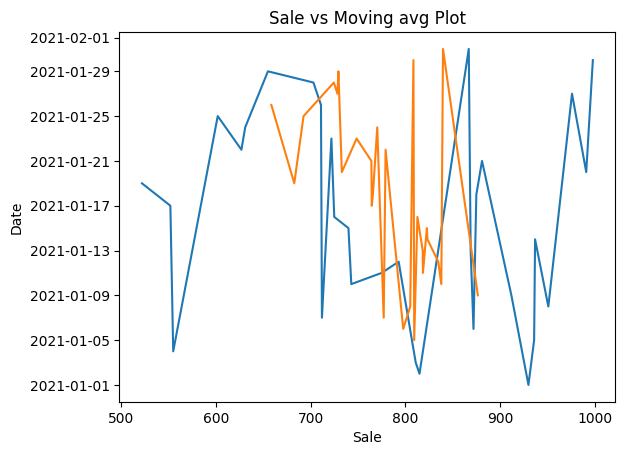

In [70]:
# Create a DataFrame DS with two columns ‘Dates’ and ‘Sale’ containing all dates of January 2021 and 31 random integers between 500 and 1000 respectively. Add another column ‘MovingAvg’ to DS containing the rolling average of 5 consecutive values in the ‘Sale’ column. Plot simple lineplots between ‘Dates’ and ‘Sale’ as well as ‘Dates’ and ‘MovingAvg’. Explain the  utility of the rolling method  with respect to these plots.
import seaborn as sns

sns.lineplot(x='Sale',y='Date',data=DS)
sns.lineplot(x='Moving avg',y='Date',data=DS).set(title='Sale vs Moving avg Plot')